In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, neighbors 
import sklearn.model_selection as ms
import scipy.stats as sts

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Генерация данных

In [3]:
def generate_sample(x, size=1):
    return 0.5 * x + 1 + sts.norm.rvs(loc=0, scale=np.sqrt(0.2), size=size)

In [4]:
X = sts.uniform.rvs(loc=-10000, scale=20000, size=500)
Y = generate_sample(X)

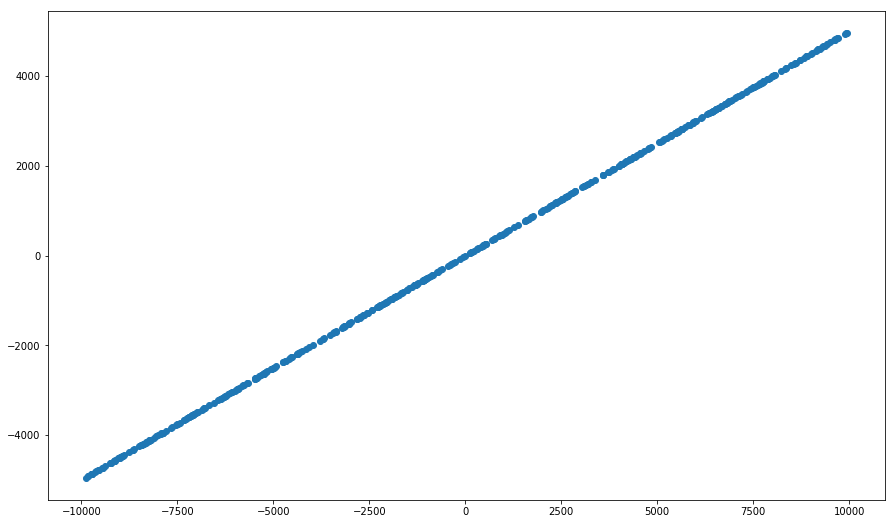

In [5]:
plt.figure(figsize=(15,9))
plt.scatter(X, Y)

In [6]:
train_data, test_data, train_target, test_target = ms.train_test_split(X, Y, test_size=0.4, random_state=1)

In [7]:
import scipy.optimize as opt

Оценим параметры $k, b$ с помощью минимизации MSE = $\frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$

In [8]:
x = train_data
target = train_target
def MSE((k, b)):
    n = float(len(target))
    return 1/n * np.sum((k * x + b - target) ** 2)

In [9]:
res = opt.minimize(MSE, (1, 1), method='Nelder-Mead', tol=1e-12)
k, b = res.x

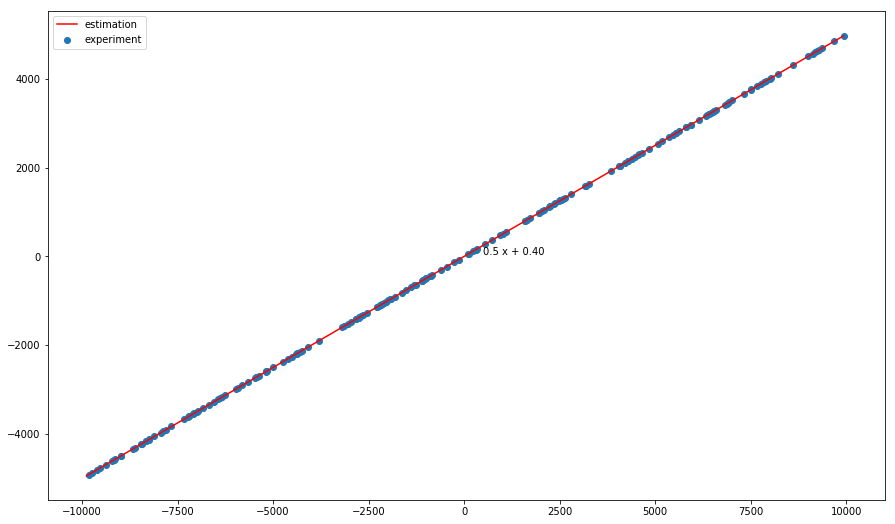

In [10]:
p = np.array([np.min(X), np.max(X)])
plt.figure(figsize=(15,9))
plt.plot(p, k * p + b, label='estimation', color='red')
plt.scatter(test_data, test_target, label='experiment')
plt.text(500, 30, s='%0.1f x + %0.2f' %(k, b))
plt.legend(loc='best')

Если провести серию оценок, то окажется, что MSE плохо оценивает $b$, но отлично 'чувствует' $k$

In [11]:
estimations = []
for i in range(100):
    X = sts.uniform.rvs(loc=-10000, scale=20000, size=500)
    Y = generate_sample(X)

    train_data, test_data, train_target, test_target = ms.train_test_split(X, Y, test_size=0.2, random_state=1)
    x = train_data
    target = train_target

    def MSE((k, b)):
        n = float(len(target))
        return 1/n * np.sum((k * x + b - target) ** 2)

    res = opt.minimize(MSE, (1, 1), method='Nelder-Mead', tol=1e-12)
    estimations.append(res.x)

Оценки $k$

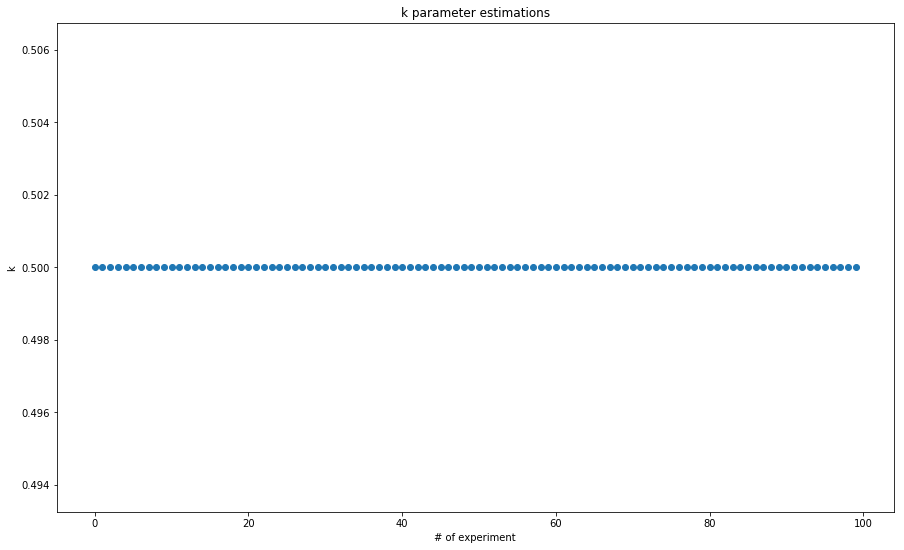

In [12]:
plt.figure(figsize=(15,9))
plt.title(u'k parameter estimations')
plt.xlabel('# of experiment')
plt.ylabel('k')
plt.scatter(np.arange(len(estimations)), map(lambda x: x[0], estimations))

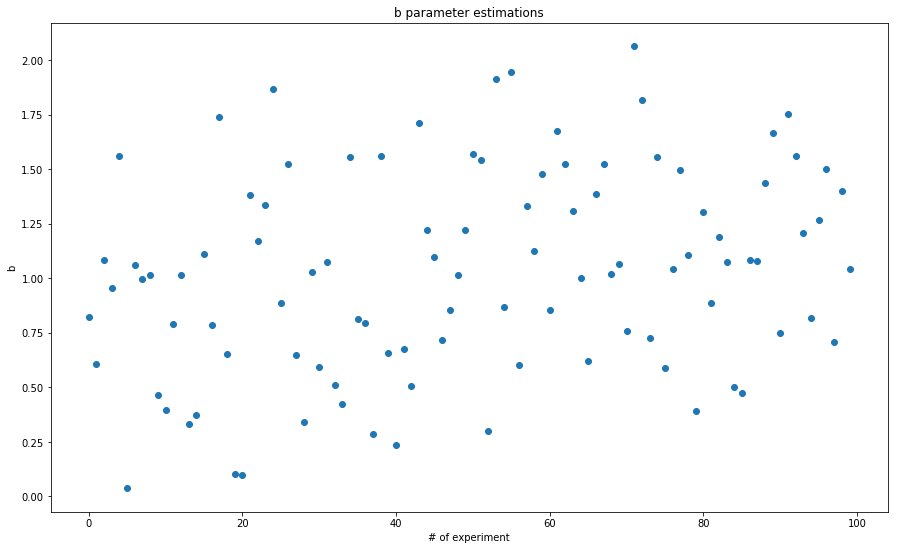

In [13]:
plt.figure(figsize=(15,9))
plt.xlabel('# of experiment')
plt.ylabel('b')
plt.title(u'b parameter estimations')
plt.scatter(np.arange(len(estimations)), map(lambda x: x[1], estimations))

Однако, усредняя оценки мы получаем, что $b=1$

In [14]:
np.average(map(lambda x: x[1], estimations))

1.0260797308698695

# Устройчивость к выбросам

Проверим устойчивость к выбросам оценок через MSE и MAE

In [15]:
def generate_sample_with_extra_noise(x):
    noise = sts.norm.rvs(loc=0, scale=np.sqrt(0.2), size=75) - 1
    real_data = 0.5 * x + 1 + sts.norm.rvs(loc=0, scale=np.sqrt(0.2), size=500) 
    return np.append(real_data, noise)

In [16]:
X = sts.uniform.rvs(loc=-10000, scale=20000, size=500)
Y_with_noise = generate_sample_with_extra_noise(X)
X_with_noise = np.append(X, sts.uniform.rvs(loc=-10000, scale=20000, size=75))
train_data, test_data, train_target, test_target = ms.train_test_split(X_with_noise, Y_with_noise, test_size=0.4, random_state=1)
x = train_data
target = train_target

In [17]:
def MSE((k, b)):
    n = float(len(target))
    return 1/n * np.sum((k * x + b - target) ** 2)

In [18]:
def MAE((k, b)):
    n = float(len(target))
    return 1/n * np.sum(np.abs(k * x + b - target))

In [19]:
res = opt.minimize(MSE, (1, 1), method='Nelder-Mead', tol=1e-12)
k_mse, b_mse = res.x

In [20]:
res = opt.minimize(MAE, (1, 1), method='Nelder-Mead', tol=1e-12)
k_mae, b_mae = res.x

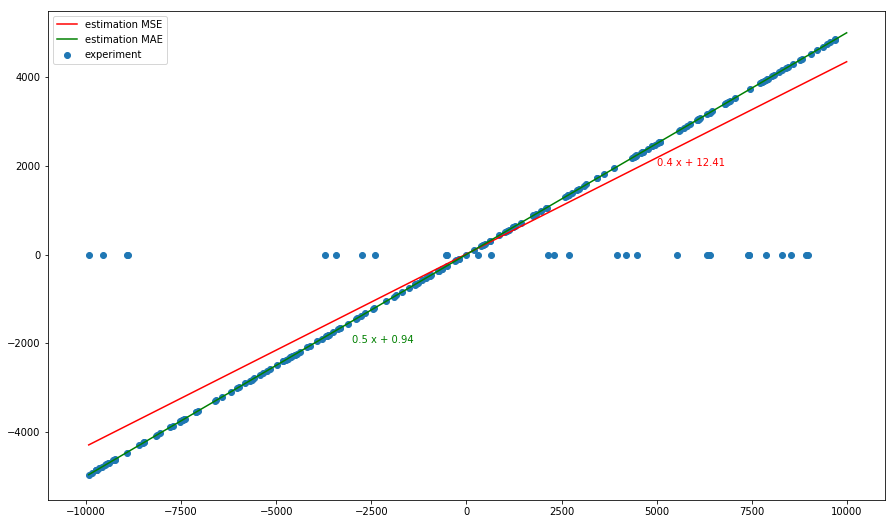

In [21]:
p = np.array([np.min(X), np.max(X)])
plt.figure(figsize=(15,9))
plt.plot(p, k_mse * p + b_mse, label='estimation MSE', color='red')
plt.plot(p, k_mae * p + b_mae, label='estimation MAE', color='green')
plt.scatter(test_data, test_target, label='experiment')
plt.text(5000, 2000, s='%0.1f x + %0.2f' %(k_mse, b_mse), color='red')
plt.text(-3000, -2000, s='%0.1f x + %0.2f' %(k_mae, b_mae), color='green')
plt.legend(loc='best')

Проведем тоже самое для случайной начальной точки optimize:

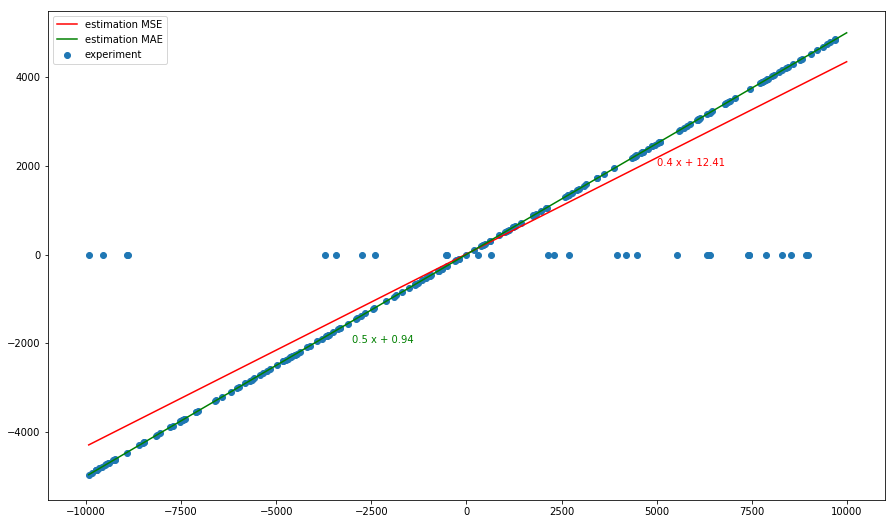

In [31]:
res = opt.minimize(MSE, (np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)), method='Nelder-Mead', tol=1e-12)
k_mse, b_mse = res.x
res = opt.minimize(MAE, (np.random.randint(-1000, 1000), np.random.randint(-1000, 1000)), method='Nelder-Mead', tol=1e-12)
k_mae, b_mae = res.x
p = np.array([np.min(X), np.max(X)])
plt.figure(figsize=(15,9))
plt.plot(p, k_mse * p + b_mse, label='estimation MSE', color='red')
plt.plot(p, k_mae * p + b_mae, label='estimation MAE', color='green')
plt.scatter(test_data, test_target, label='experiment')
plt.text(5000, 2000, s='%0.1f x + %0.2f' %(k_mse, b_mse), color='red')
plt.text(-3000, -2000, s='%0.1f x + %0.2f' %(k_mae, b_mae), color='green')
plt.legend(loc='best')

Как видим, результат такой же

Как видно из графика, $MSA$ устоичива к выбросам. $MSE$ не устоичива, т.к. штраф в отличии от $MAE$ сильнее -- мы возводим ошибку в квадрат. Из теории мы знаем, что $MSE$ оценивает мат. ожидание, а $MAE$ -- медиану. Неформально, это означает, что в первом случае получится прямая с минимальной суммой расстояний от выборки до нее. Если до выброса прямая лежала на выборке, то после неизбежно отклонение. В случае с линейным штрафом, прямая задается по 'наиболее жирному множеству точек', которое она будет интерполировать. Т.к. количество выбросов меньше, чем размер выборки, то отклонения не будет.